# P3
### Due: Thurs. 03/4/2021, 11:59pm

### GroupName: P3- Lambda

### Group members names: Navjot Kaur, Prathamesh Jadhav, Surya Ravula


# Part B 


In [1]:
##importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
import seaborn as sns
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot_ng as pydot
from IPython.display import Image, display
import matplotlib.image as mpimg

### **Q4**
For the following data set, compute the true positive rate, false positive rate, and accuracy. Threshold the Ypred classier output at each possible value.

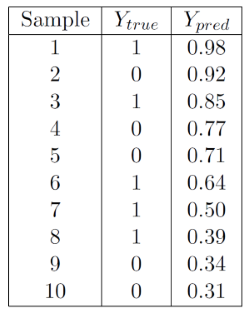

In [2]:
#prepare the data
data = pd.DataFrame({'Sample':[1,2,3,4,5,6,7,8,9,10],
                   'Y_true':[1,0,1,0,0,1,1,1,0,0],
                   'Y_pred':[0.98,0.92,0.85,0.77,0.71,0.64,0.5,0.39,0.34,0.31]})
i=0
TPR=[]
FPR=[]
ACC=[]

while i < len(data.Sample):
  Y=[]
  for x in enumerate(data['Y_pred']):
    if x[1]>=data.Y_pred[i]:
      Y.append(1)
    else:
      Y.append(0)
  a=confusion_matrix(data.Y_true,Y)
  #if numerator and denominator  are 0 we are appending TPR as 0
  if a[0][0] == 0 & a[1][0]+a[0][0]==0:
    TPR.append(0)
  else:
    TPR.append(np.round((a[0][0])/(a[0][0]+a[1][0]),3))

  FPR.append(np.round((a[0][1])/(a[0][1]+a[1][1]),3))
  ACC.append(np.round((a[0][0]+a[1][1])/(a[0][0]+a[0][1]+a[1][0]+a[1][1]),3))
  i+=1

data['FPR']=FPR
data['TPR']=TPR
data['ACC']=ACC
data

,Sample,Y_true,Y_pred,FPR,TPR,ACC
0,1,1,0.98,0.000,0.556,0.6
1,2,0,0.92,0.500,0.500,0.5
2,3,1,0.85,0.333,0.571,0.6
3,4,0,0.77,0.500,0.500,0.5
4,5,0,0.71,0.600,0.400,0.4
5,6,1,0.64,0.500,0.500,0.5
6,7,1,0.50,0.429,0.667,0.6
7,8,1,0.39,0.375,1.000,0.7
8,9,0,0.34,0.444,1.000,0.6
9,10,0,0.31,0.500,0.000,0.5


### **Q5.** We are using the results from Problem 4 to plot the ROC curve for the data using the standard plotting tools. Specifically, we are using MS Excel to get the graph. 

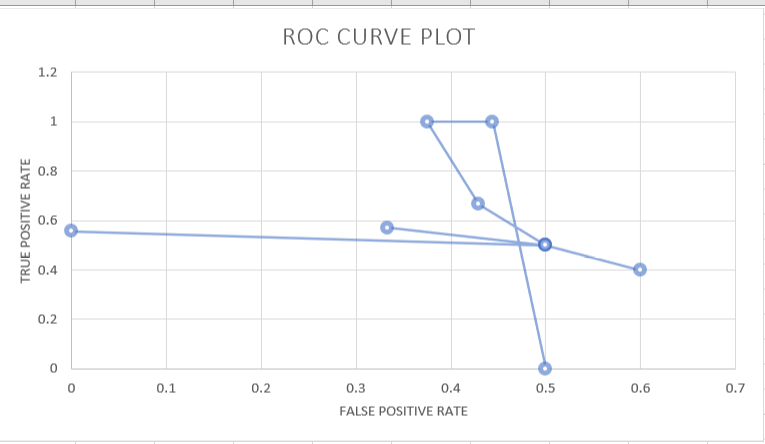

### **Q6.** Classication of Spam: Trees
For this problem, we will work to classify e-mail messages as spam or not. 

**Q(a)** Load in the spam data without including the columns in the classication task: isuid, id, domain, spampct, category, and cappct.

In [3]:
##Let's prepare the data as per requirements

spam_df = pd.read_csv('spam.csv')
spam_df = spam_df.drop(['isuid','id','domain','spampct','category','cappct'], 
           axis=1)

**Q(b).** To see whether a classier is actually working, we should compare it to a constant classier which always predicts the same class, no matter what the input features actually are. 

**i)** What fraction of the e-mails are actually spam?


32.70 fraction are actually spam; fraction is just part of actual number not percentage

In [4]:
##calculation of fraction of emails that are spam
a = spam_df[spam_df['spam']=='yes'].count()[0]
a = np.round(a/len(spam_df)*100,3)
print("{}% fractions of email are spam".format(a))

32.704% fractions of email are spam


ii. What should the constant classifier predict?

As the number of no-spam in Y is higher than spam so the constant classifier should be 'No-spam Email'

iii. What is the error rate of the constant classifier?

The error rate is 32.704%

In [5]:
#Calculating error rate

a = spam_df[spam_df['spam']!='no'].count()[0]
a = np.round(a/len(spam_df)*100,3)
print("The error rate is {} %".format(a))

The error rate is 32.704 %


**Q(c).** Now we will split the data into a training and test set with an 80/20 split of the data and a random state "124". Also we transformed the categorical/ordinal data to Numeric using onehotencoding with get_dummies().

In [6]:
##get the categorical variables and transform into numeric using get_dummies

categorical_features=[features for features in spam_df.columns 
                      if spam_df[features].dtype=='O']

X = pd.get_dummies(spam_df, columns=categorical_features,drop_first=True)

#We are using pandas get_dummies becuase it is quite efficient of all 
#the methods that we tried
#spam_df1 = pd.get_dummies(spam_df, columns=categorical_features,drop_first=True)
X = X.drop('spam_yes',axis=1)
y = spam_df[['spam']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=124)

**Q(d).** For this problem, we construct a classication tree to predict spam on the training data.

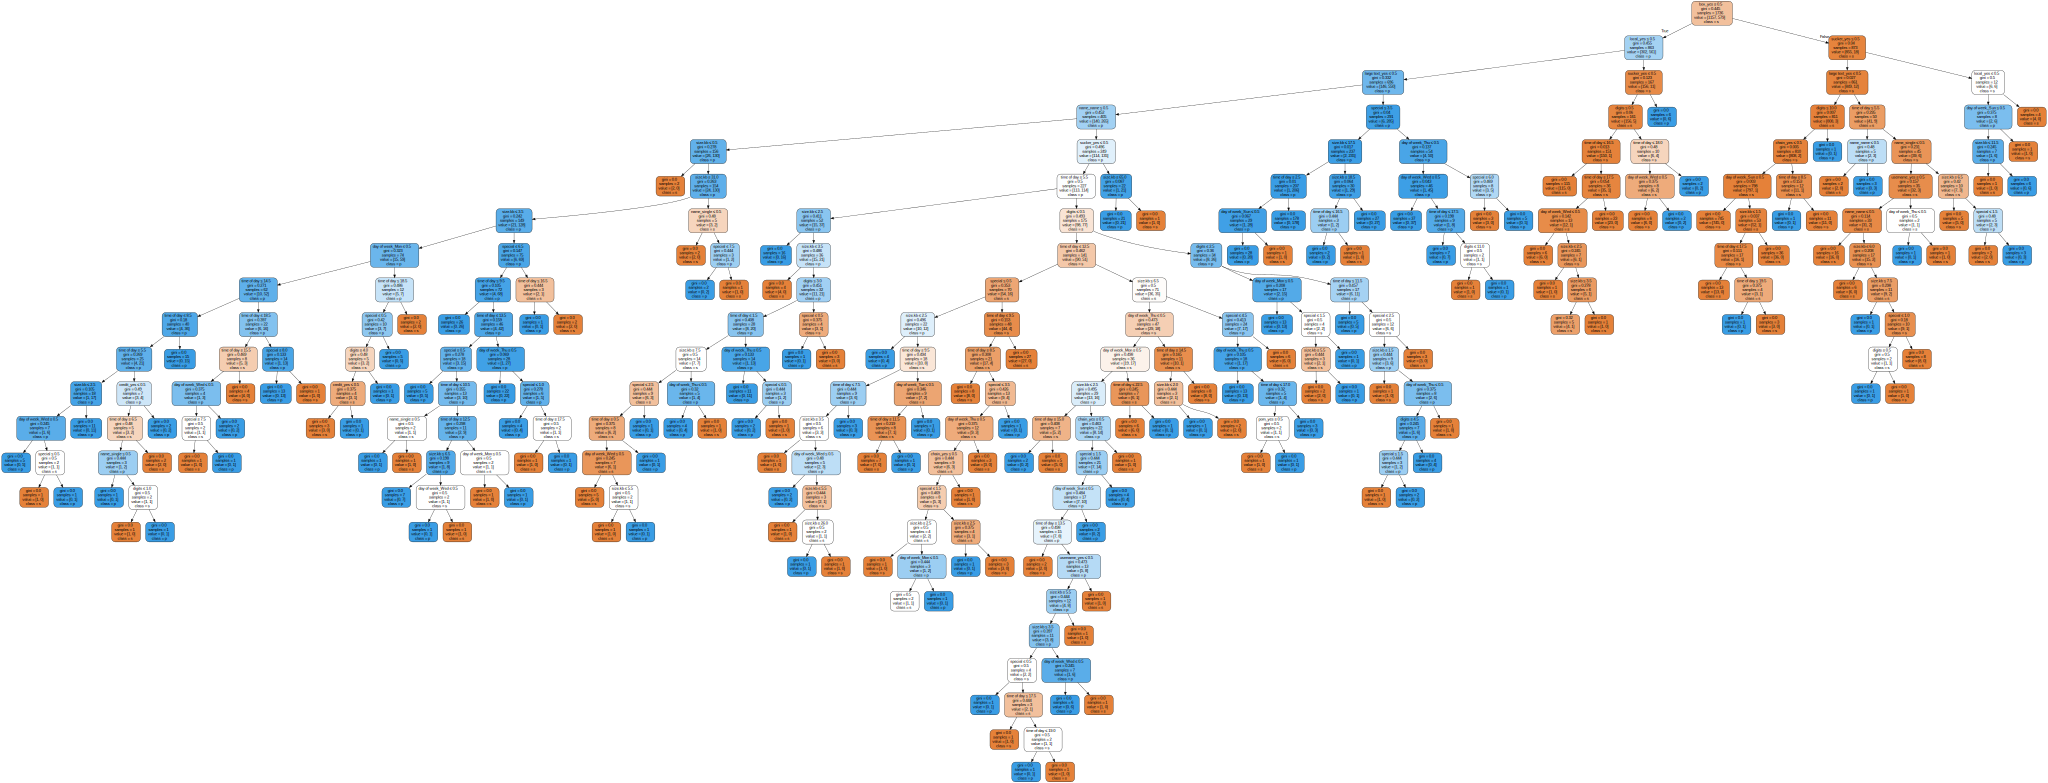

In [7]:
#creating tree for the fitted decision tree

dt_model = tree.DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,y_train)
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                         feature_names=X.columns,  
                         class_names='spam',  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)  
graph


As we have constructed the tree, it is really big and out of printing format. 

**Q(e).** 

The selection criterion is used by defaulf is 'GINI' when learning the tree model.

**Q(f).** Now we will estimate the performance of the decision tree on the training set and the testing set. Report accuracy, sensitivity, specicity, and AUC (threshold = 0.5)

In [8]:
#First report the performance for training set

y_predict = dt_model.predict(X_train)
from sklearn.metrics import accuracy_score
print('\033[1m The Accuracy for Training Set is {}'.format(
    accuracy_score(y_train, y_predict)))
tn, fp, fn, tp = confusion_matrix(y_train, y_predict).ravel()

# ROC curve takes probability so calculated probability on Xtrain
prob = dt_model.predict_proba(X_train)
prob = prob[:,1]

print('The Specificity for Training Set is {}'.format(np.round(tn/(tn+fp),3)))
print('The Sensitivity for Training Set is {}'.format(np.round(tp/(tp+fn),3)))
print('The AUC score for Training Set is {}'.format(roc_auc_score(y_train,prob)))

 The Accuracy for Training Set is 0.9988479262672811
The Specificity for Training Set is 1.0
The Sensitivity for Training Set is 0.997
The AUC score for Training Set is 0.9999947753630003


In [9]:
#Now let's report the performance for Testing  set

y_predict = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score
print('\033[1m The Accuracy for Testing Set is {}'.format(
    accuracy_score(y_test, y_predict)))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

# ROC curve takes probability so calculated probability on Xtrain 
# using threshhold 0.5 which is default

prob = dt_model.predict_proba(X_test)
prob = prob[:,1]

print('The Specificity for Testing Set is {}'.format(np.round(tn/(tn+fp),3)))
print('The Sensitivity for Testing Set is {}'.format(np.round(tp/(tp+fn),3)))
print('The AUC score for Testing Set is {}'.format(roc_auc_score(y_test,prob)))

 The Accuracy for Testing Set is 0.8896551724137931
The Specificity for Testing Set is 0.941
The Sensitivity for Testing Set is 0.771
The AUC score for Testing Set is 0.855890920048212


We can easily ovserve from the training and testing accuracies that the model is overfit. To solve this we can do pruning.

**Q(g).** Here, we have pruned  the tree and print out the tree that is a different size and report the classication performance (accuracy, sensitivity, specicity, and AUC).

In [10]:
##creating a function to plot the tree at every level of depth
def output_pdf(clf, name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_names,
                         class_names=class_name,
                         filled=True, rounded=True,
                         special_characters=True,
                          node_ids=1,)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_png("%s.png"%name)

,max_depth,Accuracy,Sensitivity,Specificity,Roc_scores
0,2,0.899194,0.950,0.874,0.921833
1,3,0.904954,0.971,0.872,0.960195
2,4,0.906682,0.978,0.871,0.971614
3,5,0.910714,0.981,0.876,0.977856
4,6,0.927995,0.855,0.965,0.983602


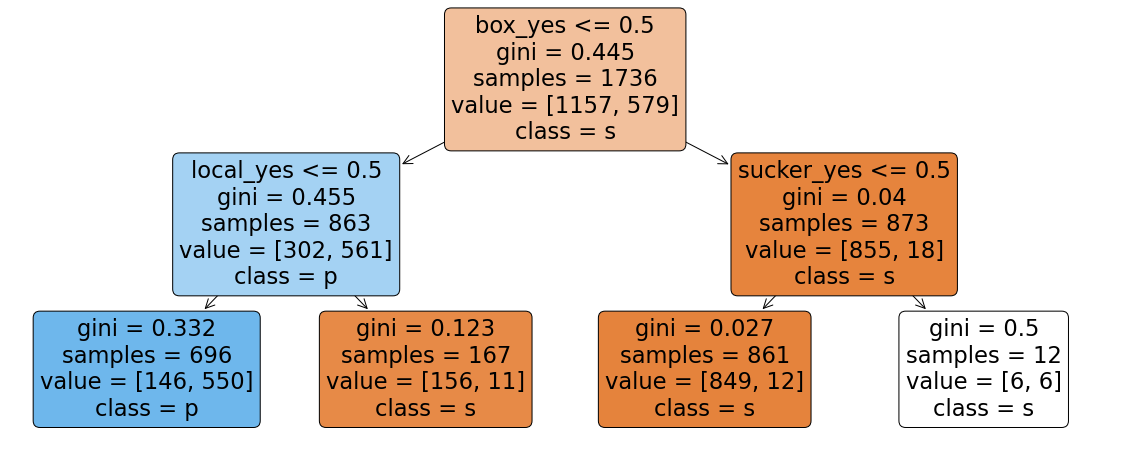

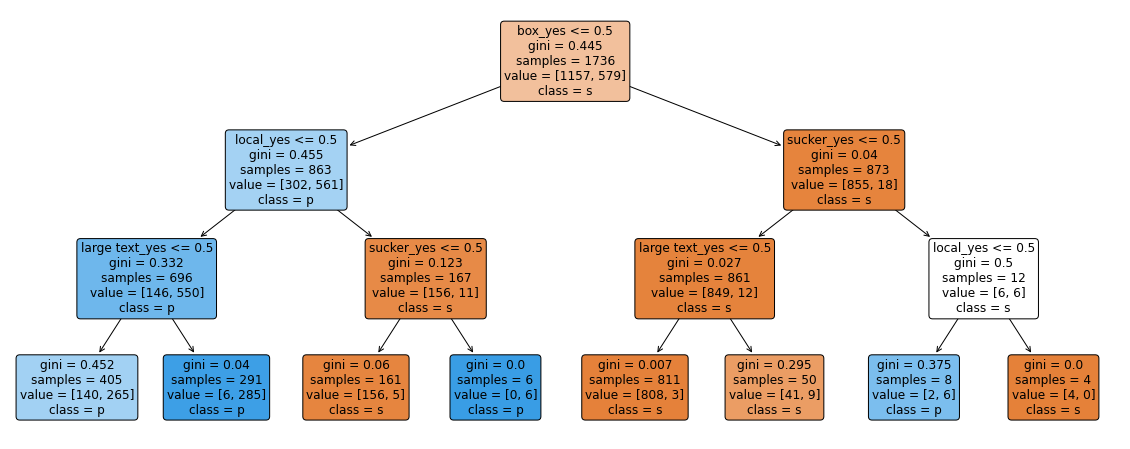

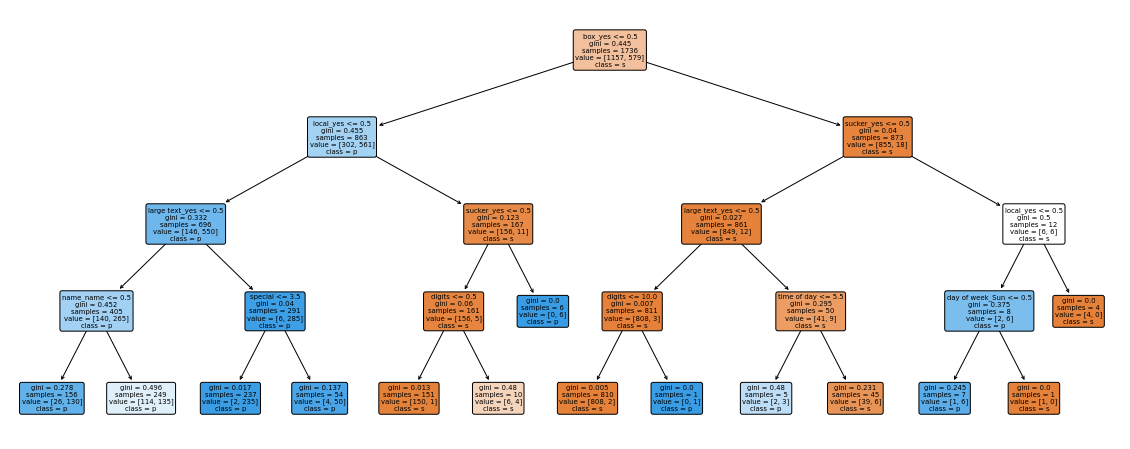

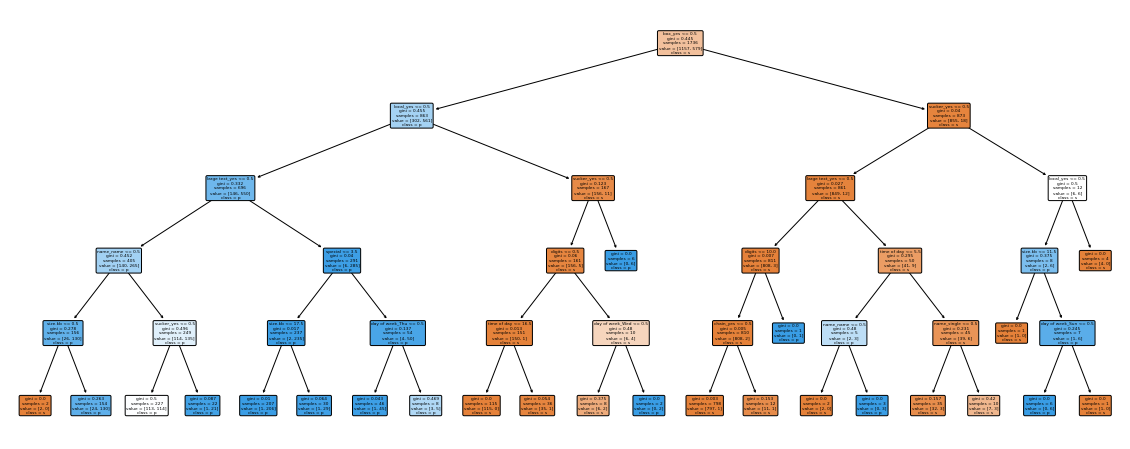

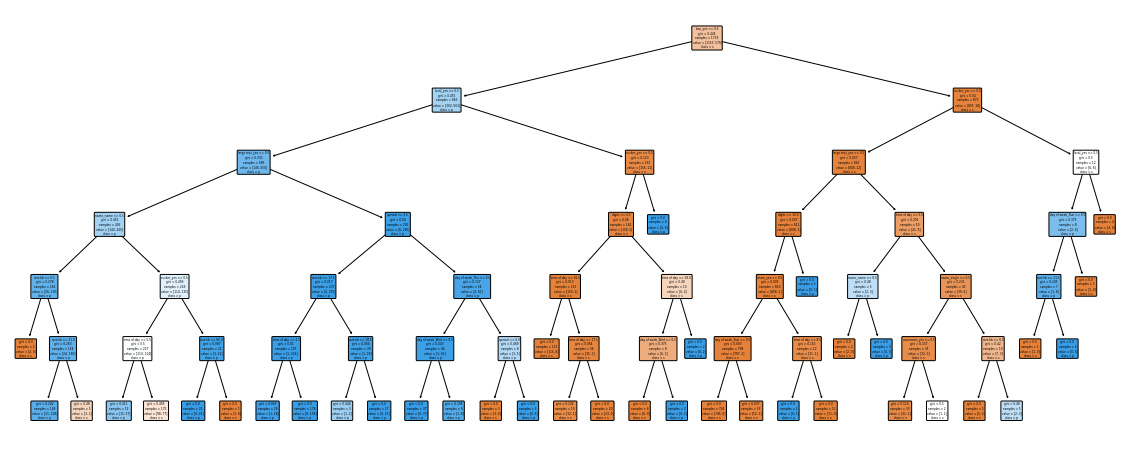

In [11]:
#Applying Pruning and computing performance for training set using max_depth

from sklearn.metrics import accuracy_score
accuracy = []
sensitivity = []
specificity = []
AUC = []
for i in range(2,7):
  
  dt_pru_model = tree.DecisionTreeClassifier(max_depth = i)
  dt_pru_model.fit(X_train,y_train)
  y_pred_train = dt_pru_model.predict(X_train)
  
  feature_names = X_train.columns
  class_name = dt_pru_model.classes_.astype(str)
  output_pdf(dt_pru_model, 'image'+str(i)+'maxdepth')
 
  fig=plt.figure(figsize=(20, 8))

  img = mpimg.imread('image'+str(i)+'maxdepth'+'.png')

  #compute accuracy
  accuracy.append(accuracy_score(y_train, y_pred_train))

  #compute the confusion matrix
  tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

  s = np.round(tn/(tn+fp),3)
  specificity.append(s)

  Sn = np.round(tp/(tp+fn),3)
  sensitivity.append(Sn)

  prob = dt_pru_model.predict_proba(X_train)
  prob = prob[:,1]
  #AUC score
  AUC.append(roc_auc_score(y_train,prob))
  tree.plot_tree(dt_pru_model,filled=True,feature_names=X.columns,
                 class_names='spam',rounded=True)

#get resulted performance matrix in a dataframe
df = pd.DataFrame({'max_depth':[2,3,4,5,6],'Accuracy':accuracy,
              'Sensitivity':sensitivity,'Specificity':specificity,
              'Roc_scores':AUC})
df.head(df.shape[0])

,max_depth,Accuracy,Sensitivity,Specificity,Roc_scores
0,2,0.889655,0.931,0.872,0.900073
1,3,0.887356,0.931,0.868,0.929301
2,4,0.894253,0.947,0.872,0.946163
3,5,0.896552,0.947,0.875,0.952202
4,6,0.887356,0.763,0.941,0.945146


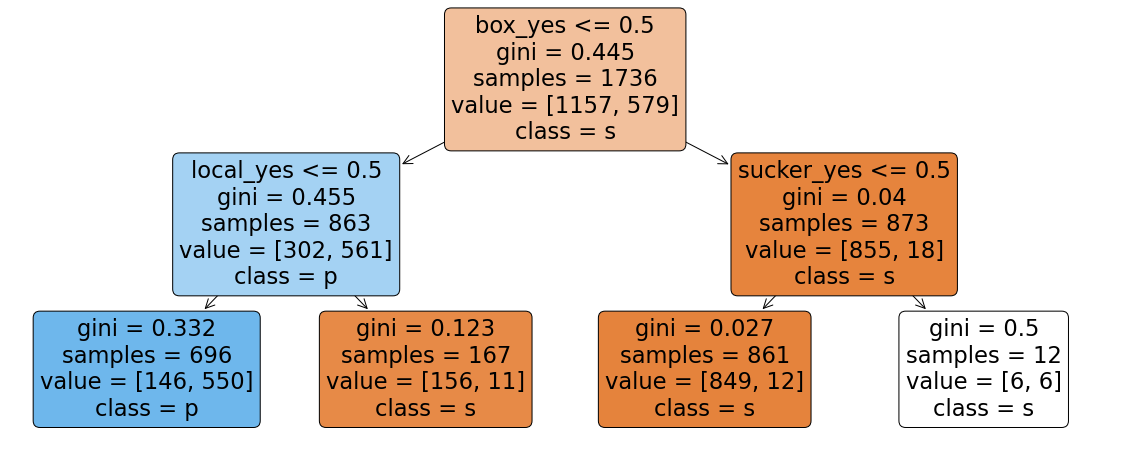

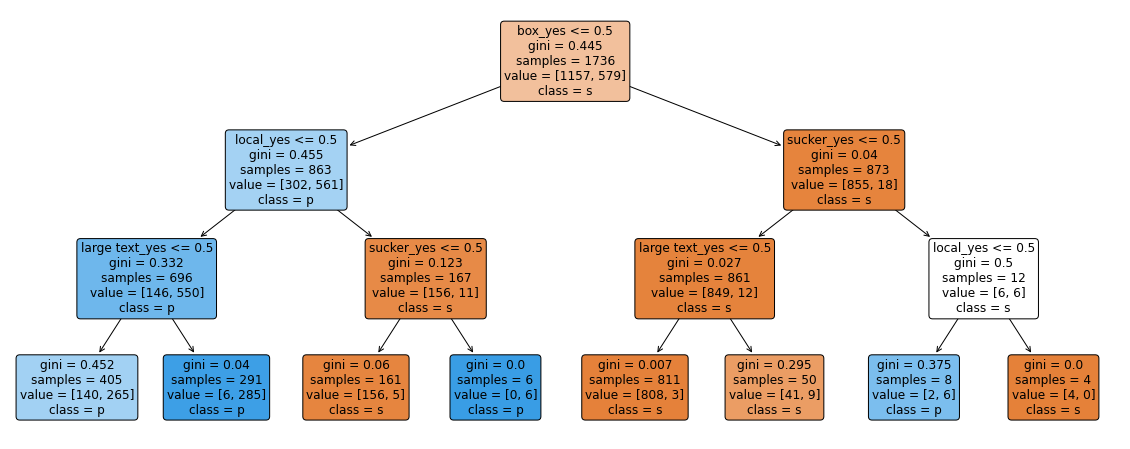

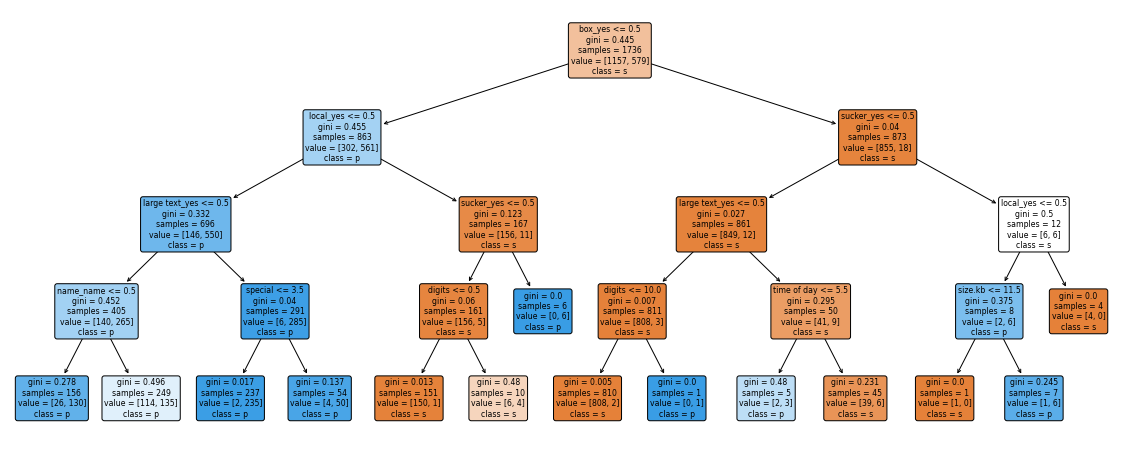

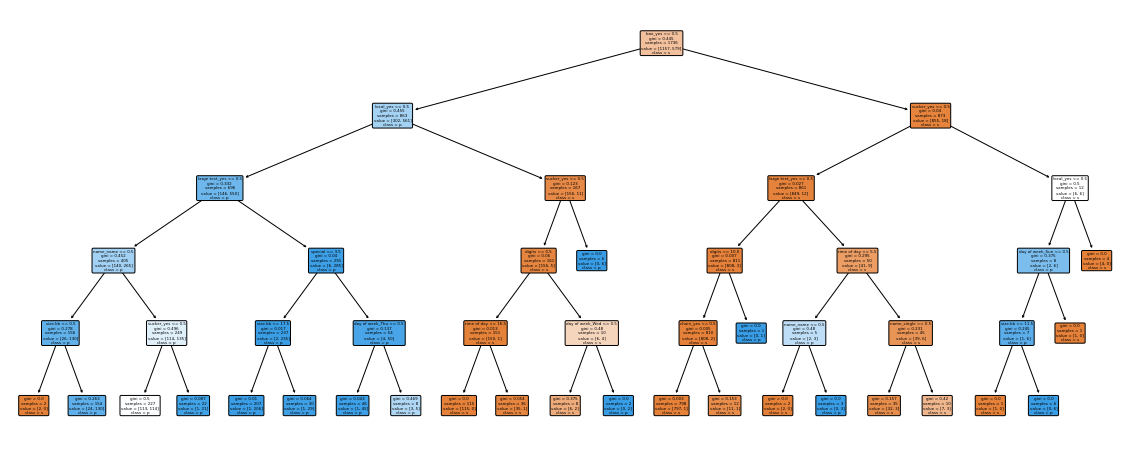

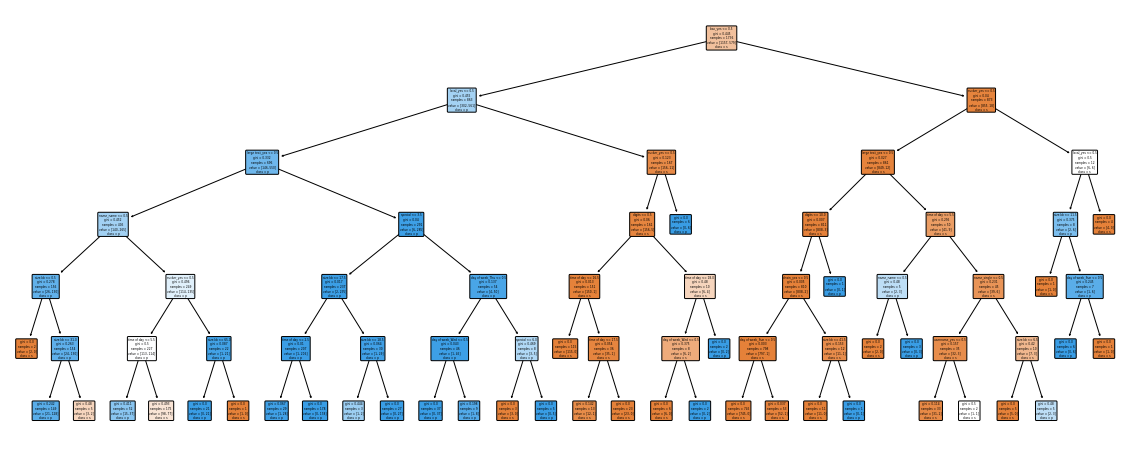

In [12]:
#Applying Pruning and computing performance for testing set using max_depth

from sklearn.metrics import accuracy_score
accuracy = []
sensitivity = []
specificity = []
AUC = []
for i in range(2,7):
  
  dt_pru_model = tree.DecisionTreeClassifier(max_depth = i)
  dt_pru_model.fit(X_train,y_train)
  y_pred_test = dt_pru_model.predict(X_test)
  
  feature_names = X_train.columns
  class_name = dt_pru_model.classes_.astype(str)
  output_pdf(dt_pru_model, 'image'+str(i)+'maxdepth_testing')
 
  fig=plt.figure(figsize=(20, 8))

  img = mpimg.imread('image'+str(i)+'maxdepth_testing'+'.png')

  #compute accuracy
  accuracy.append(accuracy_score(y_test, y_pred_test))

  #compute the confusion matrix
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

  s = np.round(tn/(tn+fp),3)
  specificity.append(s)

  Sn = np.round(tp/(tp+fn),3)
  sensitivity.append(Sn)

  prob = dt_pru_model.predict_proba(X_test)
  prob = prob[:,1]
  #AUC score
  AUC.append(roc_auc_score(y_test,prob))
  tree.plot_tree(dt_pru_model,filled=True,feature_names=X.columns,
                 class_names='spam',rounded=True)

#get resulted performance matrix in a dataframe
df = pd.DataFrame({'max_depth':[2,3,4,5,6],'Accuracy':accuracy,
              'Sensitivity':sensitivity,'Specificity':specificity,
              'Roc_scores':AUC})
df.head(df.shape[0])

As we applied pruning using 5 different max_depths, the model overcame the Overfitting. 

### **Q7:** Spam, Spam, Spam

**Q(a).** For this problem, first we have to prepare the data for a 10-fold cross-validation using Min-Max scaling (0,1).

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X.iloc[:,0:4] = scale.fit_transform(X.iloc[:,0:4])

**Q(b).** Estimate the generalization performance over the 10-
folds, calculate and report the accuracy, sensitivity, specicity, and AUC performance on the testing data.


**Qi.** First let's do the experimental evaluation if we setup correctly!



For the experiment design, we have first setup our dataset as per the requirmenets and then performed scalling. Further to simplify this problem, we will first define the functions for each model for part (ii), (iii), and (iv) and then perform the 10 folds cross validation. 

In [16]:
#ii. Function for KNN classifier and to predict performance results for 
#k = 3, 7, 11, 15.

def knn(X,y):
  k =[2,3,4,5]
  for i in k:
    #compute evaluation parameters
    for train_index,test_index in skf.split(X,y):
      Xtrain,Xtest = X.iloc[train_index],X.iloc[test_index]
      ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
      model_1 = KNeighborsClassifier(n_neighbors=i)
      model_1.fit(Xtrain,ytrain)
      y_pred = model_1.predict(Xtest)
      
      Accuracy.append(accuracy_score(ytest, y_pred))
      tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
      Specificity.append(np.round(tn/(tn+fp),3))
      Sensitivity.append(np.round(tp/(tp+fn),3))
      prob = model_1.predict_proba(Xtest)
      prob = prob[:,1]
      AUC.append(roc_auc_score(ytest,prob))

# iii. Function for Decision Tree classifier and to predict performance results  
def Decison_tree(X,y):
  maxdepth = [4,5]
  for i in maxdepth:
    for train_index,test_index in skf.split(X,y):
      Xtrain,Xtest = X.iloc[train_index],X.iloc[test_index]
      ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

      clf = tree.DecisionTreeClassifier(max_depth=i)
      clf=clf.fit(Xtrain,ytrain)
      y_pred=clf.predict(Xtest)

      Accuracy.append(accuracy_score(ytest, y_pred))
      tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
      Specificity.append(np.round(tn/(tn+fp),3))
      Sensitivity.append(np.round(tp/(tp+fn),3))
      prob = clf.predict_proba(Xtest)
      prob = prob[:,1]
      AUC.append(roc_auc_score(ytest,prob))

#iv. Function for Naive Bayes classifier and to predict performance results  
def Naive(X,y):
  for train_index,test_index in skf.split(X,y):
      Xtrain,Xtest = X.iloc[train_index],X.iloc[test_index]
      ytrain,ytest = y.iloc[train_index],y.iloc[test_index] 
      clf = GaussianNB()
      clf.fit(Xtrain,ytrain)
      y_pred = clf.predict(Xtest)

      Accuracy.append(accuracy_score(ytest, y_pred))
      tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
      Specificity.append(np.round(tn/(tn+fp),3))
      Sensitivity.append(np.round(tp/(tp+fn),3))
      prob = clf.predict_proba(Xtest)
      prob = prob[:,1]
      AUC.append(roc_auc_score(ytest,prob))      

In [17]:
##Now, we will implement the Startafied 10 KFold

skf = StratifiedKFold(n_splits=10,random_state=124)
Accuracy=[]
Sensitivity=[]
Specificity=[]
AUC=[]

#calling the above defined functions to train and predict the models
knn(X,y)
Decison_tree(X,y)
Naive(X,y)

In [18]:
##Here, we setup the dataframes for each model and their performance results
ACC = pd.DataFrame({'knn_2':[], 'knn_3':[],'knn_4':[],'knn_5':[],'DT_MAX_3':[],
                   'DT_MAX_4':[],'NAIVE_BAYES':[]})
Sens = pd.DataFrame({'knn_2':[], 'knn_3':[],'knn_4':[],'knn_5':[],'DT_MAX_3':[],
                    'DT_MAX_4':[],'NAIVE_BAYES':[]})
Specs = pd.DataFrame({'knn_2':[], 'knn_3':[],'knn_4':[],'knn_5':[],'DT_MAX_3':[],
                     'DT_MAX_4':[],'NAIVE_BAYES':[]})
auc = pd.DataFrame({'knn_2':[], 'knn_3':[],'knn_4':[],'knn_5':[],'DT_MAX_3':[],
                   'DT_MAX_4':[],'NAIVE_BAYES':[]})

folds = 10
a = []
a = ACC.columns
temp = 0
for i  in range(len(ACC.columns)):
  ACC[a[i]]=Accuracy[temp:temp+10]
  Sens[a[i]]=Sensitivity[temp:temp+10]
  Specs[a[i]]=Specificity[temp:temp+10]
  auc[a[i]]=AUC[temp:temp+10]
  temp+=10
ACC.loc['mean'] = ACC.mean()
Sens.loc['mean'] = Sens.mean()
Specs.loc['mean'] = Specs.mean()
auc.loc['mean'] = auc.mean()
index_name = ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Fold6', 'Fold7', 
              'Fold8', 'Fold9' ,'Fold10' ,'Mean']
ACC.index=index_name
Sens.index=index_name
Specs.index=index_name
auc.index=index_name   


In [19]:
#Get the Accuracy Table and reporting the mean accuracy
ACC

,knn_2,knn_3,knn_4,knn_5,DT_MAX_3,DT_MAX_4,NAIVE_BAYES
Fold1,0.733945,0.729358,0.756881,0.743119,0.651376,0.646789,0.834862
Fold2,0.861751,0.935484,0.894009,0.917051,0.884793,0.884793,0.921659
Fold3,0.958525,0.963134,0.967742,0.972350,0.949309,0.949309,1.000000
Fold4,0.921659,0.940092,0.935484,0.935484,0.944700,0.907834,0.894009
Fold5,0.967742,0.949309,0.967742,0.949309,0.935484,0.935484,0.958525
Fold6,0.834101,0.889401,0.912442,0.917051,0.953917,0.866359,0.847926
Fold7,0.843318,0.847926,0.834101,0.857143,0.861751,0.861751,0.880184
Fold8,0.917051,0.953917,0.949309,0.953917,0.949309,0.949309,0.940092
Fold9,0.852535,0.903226,0.889401,0.921659,0.940092,0.861751,0.917051
Fold10,0.801843,0.875576,0.852535,0.866359,0.926267,0.815668,0.843318


In [20]:
#Sensitivity Table and reporting the mean Sensitivity
Sens

,knn_2,knn_3,knn_4,knn_5,DT_MAX_3,DT_MAX_4,NAIVE_BAYES
Fold1,0.592,0.8310,0.7320,0.845,0.7890,0.8310,0.5630
Fold2,0.634,0.8590,0.7180,0.803,1.0000,1.0000,0.7750
Fold3,0.944,0.9860,0.9580,0.986,1.0000,1.0000,1.0000
Fold4,0.775,0.8730,0.8450,0.873,0.9720,0.7750,0.9010
Fold5,0.944,0.9720,0.9720,0.972,0.9580,0.8870,0.9860
Fold6,0.563,0.8170,0.7750,0.845,0.9580,0.6060,0.8030
Fold7,0.634,0.7320,0.6760,0.761,0.8450,0.8450,0.8030
Fold8,0.803,0.9300,0.9150,0.930,0.9580,0.9580,0.9010
Fold9,0.620,0.8310,0.7180,0.845,0.9720,0.6480,0.8730
Fold10,0.451,0.6900,0.6200,0.690,0.9150,0.5350,0.6620


In [21]:
#Specificity Table and reporting the mean Specificity
Specs

,knn_2,knn_3,knn_4,knn_5,DT_MAX_3,DT_MAX_4,NAIVE_BAYES
Fold1,0.8030,0.6800,0.7690,0.694,0.585,0.558,0.9660
Fold2,0.9730,0.9730,0.9790,0.973,0.829,0.829,0.9930
Fold3,0.9660,0.9520,0.9730,0.966,0.925,0.925,1.0000
Fold4,0.9930,0.9730,0.9790,0.966,0.932,0.973,0.8900
Fold5,0.9790,0.9380,0.9660,0.938,0.925,0.959,0.9450
Fold6,0.9660,0.9250,0.9790,0.952,0.952,0.993,0.8700
Fold7,0.9450,0.9040,0.9110,0.904,0.870,0.870,0.9180
Fold8,0.9730,0.9660,0.9660,0.966,0.945,0.945,0.9590
Fold9,0.9660,0.9380,0.9730,0.959,0.925,0.966,0.9380
Fold10,0.9730,0.9660,0.9660,0.952,0.932,0.952,0.9320


In [22]:
#Auc table and reporting the mean AUC
auc

,knn_2,knn_3,knn_4,knn_5,DT_MAX_3,DT_MAX_4,NAIVE_BAYES
Fold1,0.764348,0.788684,0.809284,0.835345,0.777426,0.763581,0.854316
Fold2,0.940093,0.962473,0.975400,0.972313,0.975014,0.977619,0.985674
Fold3,0.980947,0.984806,0.991221,0.993102,0.993054,0.993054,1.000000
Fold4,0.942215,0.971686,0.970384,0.974339,0.987170,0.963728,0.955914
Fold5,0.973809,0.975786,0.981816,0.981430,0.991077,0.990546,0.982828
Fold6,0.886456,0.930060,0.951187,0.953888,0.982973,0.951910,0.931217
Fold7,0.868898,0.888385,0.901457,0.922198,0.901794,0.885539,0.915011
Fold8,0.954177,0.960592,0.961557,0.960592,0.957698,0.956734,0.971445
Fold9,0.915734,0.936571,0.949112,0.955528,0.958277,0.953261,0.969564
Fold10,0.837353,0.864364,0.897984,0.910187,0.962184,0.918966,0.935993


### **Q8.**
For this problem we are write a function, "classifierPerf" that will evaluate the predictions of a classier without using any inbuilt library

In [23]:
import numpy as np

pred_labels = np.asarray([0,1,1,0,1,0,0])
true_labels = np.asarray([0,0,1,0,0,1,0])
def classifierPerf(y_true,y_pred):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  if len(y_true)!= len(y_pred):
    print('The size of given arrays are not matching ')
  for i in range(len(y_true)):
    if y_true[i]==1 and y_pred[i]==1:
      TP+=1
    elif y_true[i]==0 and y_pred[i]==0:
      TN+=1
    elif y_true[i]==0 and y_pred[i]==1:
      FP+=1
    elif y_true[i]==1 and y_pred[i]==0:  
      FN+=1
  return{'TPR':np.round(TP/(TP+FN),3),
         
  'TNR':np.round(TN/(FP+TN),3),
  'ACC':np.round(((TP+TN)/(TP+FP+TN+FN)),3),
  'Sens':np.round(TP/(TP+FN),3),
  'Spec':np.round(TN/(TN+FP),3),
  'Prec':np.round(TP/(TP+FP),3),
  'Rec':np.round(TP/(TP+FN),3),
  'Err':np.round((FN+FP)/(TP+FP+TN+FN),3)}
  
classifierPerf(true_labels,pred_labels)

{'ACC': 0.571,
 'Err': 0.429,
 'Prec': 0.333,
 'Rec': 0.5,
 'Sens': 0.5,
 'Spec': 0.6,
 'TNR': 0.6,
 'TPR': 0.5}